In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [6]:
# Carga de los datos 
data = pd.read_csv("D:\python\customer_data.csv")
data

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100),Categoría de Producto Favorito
0,1,56,89,47,Libros
1,2,69,91,86,Hogar
2,3,46,46,23,Electrónica
3,4,32,28,66,Libros
4,5,60,81,27,Electrónica
...,...,...,...,...,...
195,196,69,77,99,Libros
196,197,30,86,36,Electrónica
197,198,58,65,82,Electrónica
198,199,20,43,96,Alimentos


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ID Cliente                      200 non-null    int64 
 1   Edad                            200 non-null    int64 
 2   Ingresos Anuales (k$)           200 non-null    int64 
 3   Puntuación de Gasto (1-100)     200 non-null    int64 
 4   Categoría de Producto Favorito  200 non-null    object
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.describe()

,ID Cliente,Edad,Ingresos Anuales (k$),Puntuación de Gasto (1-100)
count,200.000000,200.00000,200.000000,200.000000
mean,100.500000,43.42500,69.580000,49.910000
std,57.879185,14.94191,29.693808,29.409292
min,1.000000,18.00000,20.000000,1.000000
25%,50.750000,31.00000,43.750000,24.000000
50%,100.500000,43.50000,69.500000,50.000000
75%,150.250000,56.00000,92.500000,74.000000
max,200.000000,69.00000,119.000000,99.000000


In [16]:
# Normalizacion de los datos
escalador = MinMaxScaler()
data_escalada = escalador.fit_transform(data[['Edad', 'Ingresos Anuales (k$)', 'Puntuación de Gasto (1-100)']])
data_escalada

array([[0.74509804, 0.6969697 , 0.46938776],
       [1.        , 0.71717172, 0.86734694],
       [0.54901961, 0.26262626, 0.2244898 ],
       [0.2745098 , 0.08080808, 0.66326531],
       [0.82352941, 0.61616162, 0.26530612],
       [0.1372549 , 0.36363636, 0.01020408],
       [0.39215686, 0.96969697, 0.90816327],
       [0.74509804, 0.50505051, 0.16326531],
       [0.35294118, 0.43434343, 0.32653061],
       [0.43137255, 0.23232323, 0.08163265],
       [0.19607843, 0.78787879, 0.42857143],
       [0.19607843, 0.58585859, 0.47959184],
       [0.45098039, 0.31313131, 0.3877551 ],
       [0.68627451, 0.95959596, 0.93877551],
       [0.76470588, 0.87878788, 0.41836735],
       [0.45098039, 0.51515152, 0.25510204],
       [0.03921569, 0.61616162, 1.        ],
       [0.41176471, 0.57575758, 0.5       ],
       [0.01960784, 0.51515152, 0.24489796],
       [0.45098039, 0.11111111, 0.23469388],
       [0.84313725, 0.38383838, 0.12244898],
       [0.56862745, 0.01010101, 0.60204082],
       [0.

In [17]:
# Aplicion del algoritmo PCA
pca= PCA(n_components=2)
pca_resultados=pca.fit_transform(data_escalada)

In [20]:
#aplicacion del algoritmo SVD
U,Sigma,VT = np.linalg.svd(data_escalada)

In [21]:
# Seleccion de los dos primeros componentes singulares para reducir las dimensiones
k = 2
svd_resultados = U[:, :k] * Sigma[:k]

In [22]:
# Clustering  usando K-Means y Clustering Jerarquico

In [23]:
# Aplicacion del algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_escalada)

In [25]:
#Aplicacion de cluster jerarquico
linked=linkage(data_escalada, method="ward")

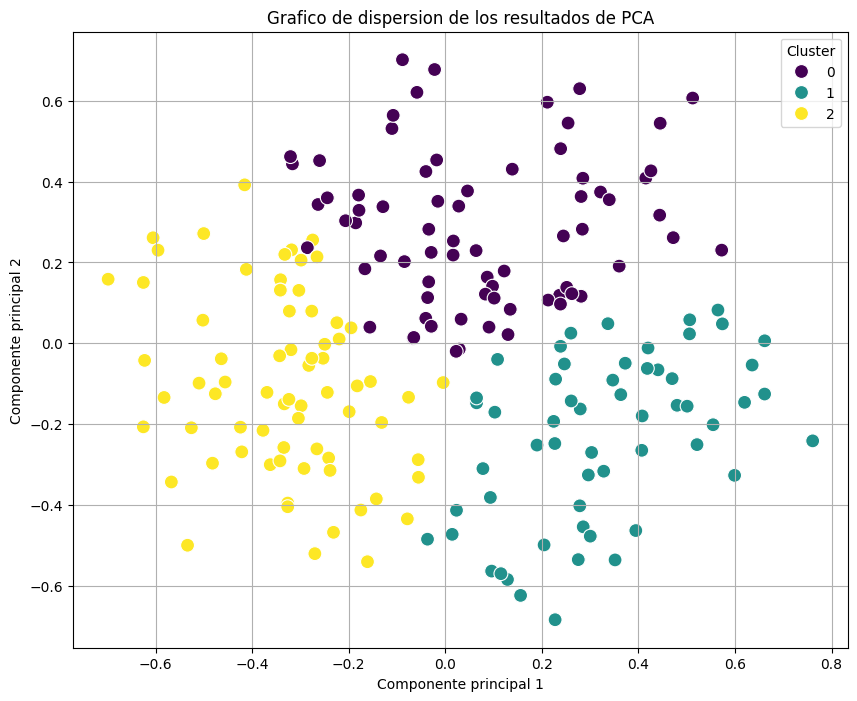

In [28]:
# creacion de grafico de dispersion para los resultados de PCA
plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_resultados[:,0], y=pca_resultados[:,1], hue=kmeans_clusters, palette="viridis", s=100)
plt.title("Grafico de dispersion de los resultados de PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title="Cluster")
plt.grid(True)

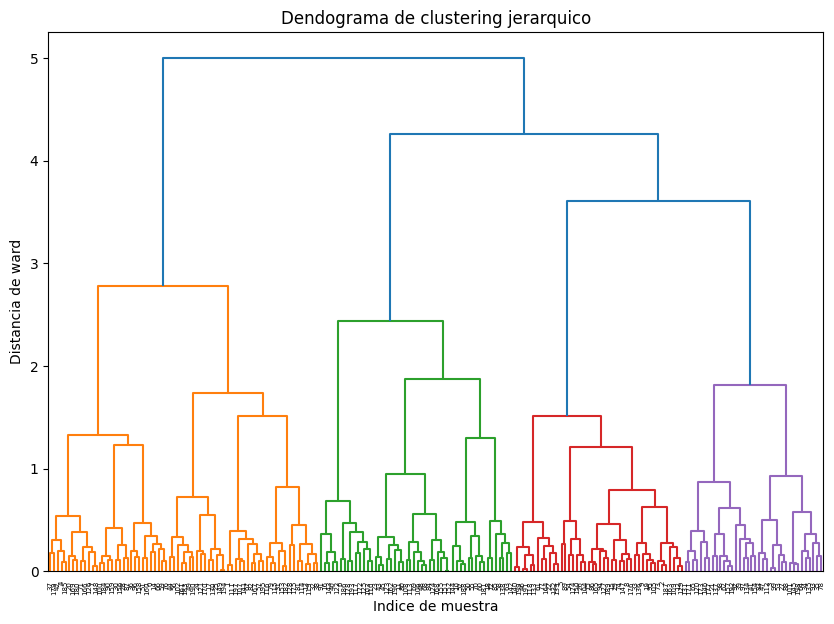

In [29]:
# Diagrama dengrograma del para cluster de jerarquias
plt.figure(figsize=(10,7))
dendrogram(linked)
plt.title("Dendograma de clustering jerarquico")
plt.xlabel("Indice de muestra")
plt.ylabel("Distancia de ward")
plt.axhline(y=10,color="r",linestyle="--")

In [32]:
# Loop para mostrar los datos basicos de los diferentes clusters como la edad media, ingresos medios 
# y puntuacion de gastos medios

# Analisis de clusters para determinar estrategias
cluster_info = pd.DataFrame({
    "Cluster": kmeans_clusters,
    "Edad": data["Edad"],
    "Ingresos": data["Ingresos Anuales (k$)"],
    "Gasto": data["Puntuación de Gasto (1-100)"]
})

# Descripcion de cada cluster
for cluster in cluster_info["Cluster"].unique():
    cluster_data = cluster_info[cluster_info["Cluster"] == cluster]
    print(f"Cluster {cluster}:")
    print(f"1.-Edad media {cluster_data['Edad'].mean():.0f}")
    print(f"2.-Ingresos Medios: {cluster_data['Ingresos'].mean():.2f}")
    print(f"3.-Puntuacion de gasto media: {cluster_data['Gasto'].mean():.2f}")
    print()

#data_escalada = escalador.fit_transform(data[['Edad', '', '']])

Cluster 1:
1.-Edad media 58
2.-Ingresos Medios: 95.47
3.-Puntuacion de gasto media: 58.86

Cluster 2:
1.-Edad media 42
2.-Ingresos Medios: 49.79
3.-Puntuacion de gasto media: 21.63

Cluster 0:
1.-Edad media 33
2.-Ingresos Medios: 68.60
3.-Puntuacion de gasto media: 70.71

